In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.2.0-bin-hadoop3.2"

In [3]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
df = spark.read.csv("/content/drive/MyDrive/Patient_Survival_Final_Dataset.csv", header=True, inferSchema=True)

In [37]:
df.show()

+---+-----------+------+--------------------+------------+-----------------+----------------+----------------+---------------+-----------------+---------------+----------------+----------------+---------------+-----------+-------------+----------+----------------------+------------------------+------------+-------------------------+-------------+----------------------+----------+-----------+-----------+------------------------+------------+-----------------+---------------+----------------+--------------------+-------------------+--------------+
|age|        bmi|gender|    icu_admit_source|    icu_type|ventilated_apache|intubated_apache|d1_heartrate_max|h1_resprate_max|heart_rate_apache|d1_resprate_max|h1_heartrate_max|d1_potassium_max|h1_resprate_min|h1_spo2_min|h1_diasbp_min|h1_mbp_min|h1_mbp_noninvasive_min|h1_sysbp_noninvasive_min|h1_sysbp_min|d1_diasbp_noninvasive_min|d1_diasbp_min|d1_mbp_noninvasive_min|d1_mbp_min|d1_spo2_min|d1_temp_min|d1_sysbp_noninvasive_min|d1_sysbp_min|gcs_

# Gender and Hospital Death

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import count

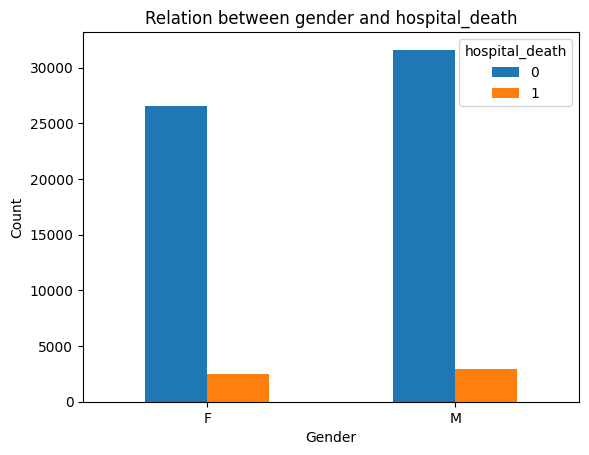

In [32]:

grouped_data = df.groupBy('gender', 'hospital_death').agg(count('*').alias('count'))

# Convert the PySpark DataFrame to a pandas DataFrame
pandas_df = grouped_data.toPandas()

# Plot the relation between the two categorical variables
pandas_df.pivot(index='gender', columns='hospital_death', values='count').plot(kind='bar')

# Add labels to the graph
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relation between gender and hospital_death')
plt.show()


# Age and Hospital Death

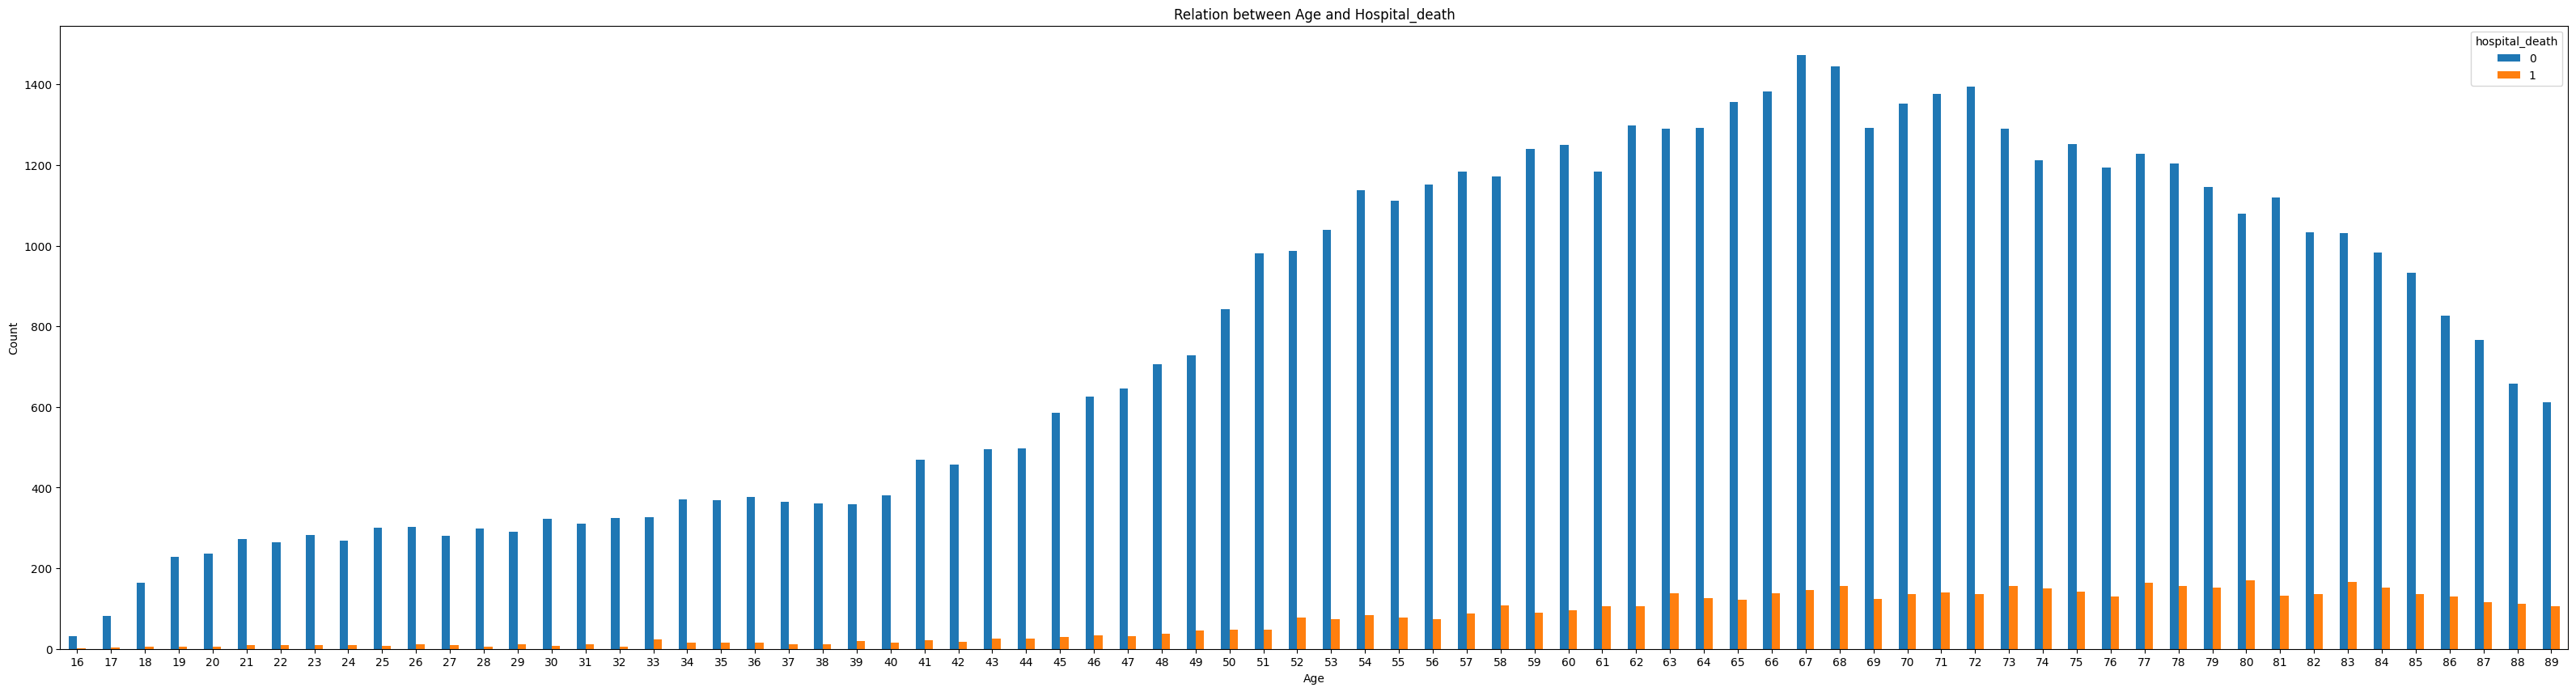

In [35]:
grouped_data = df.groupBy('age', 'hospital_death').agg(count('*').alias('count'))

# Convert the PySpark DataFrame to a pandas DataFrame
pandas_df = grouped_data.toPandas()

# Create the plot with a wider width
fig, ax = plt.subplots(figsize=(40,10))

# Plot the relation between the two categorical variables
pandas_df.pivot(index='age', columns='hospital_death', values='count').plot(kind='bar', ax=ax)

# Add labels to the graph
plt.xticks(rotation=0)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Relation between Age and Hospital_death')
plt.show()


# ICU_ADMIT_ and Hospital Death

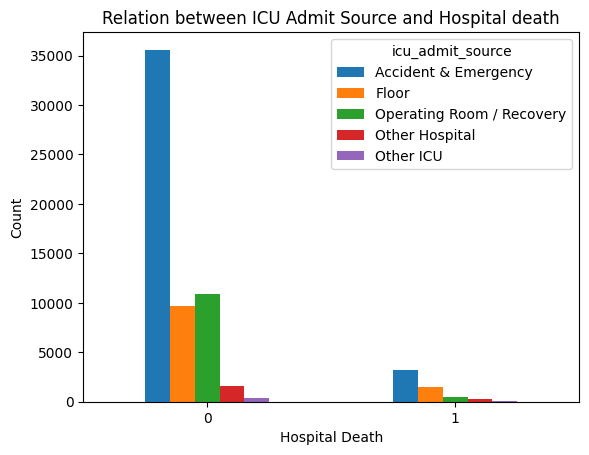

In [40]:

grouped_data = df.groupBy('icu_admit_source', 'hospital_death').agg(count('*').alias('count'))

# Convert the PySpark DataFrame to a pandas DataFrame
pandas_df = grouped_data.toPandas()

# Plot the relation between the two categorical variables
pandas_df.pivot(index='hospital_death', columns='icu_admit_source', values='count').plot(kind='bar')

# Add labels to the graph
plt.xticks(rotation=0)
plt.xlabel('Hospital Death')
plt.ylabel('Count')
plt.title('Relation between ICU Admit Source and Hospital death')
plt.show()


# ICU Admit Type and Hospital Death

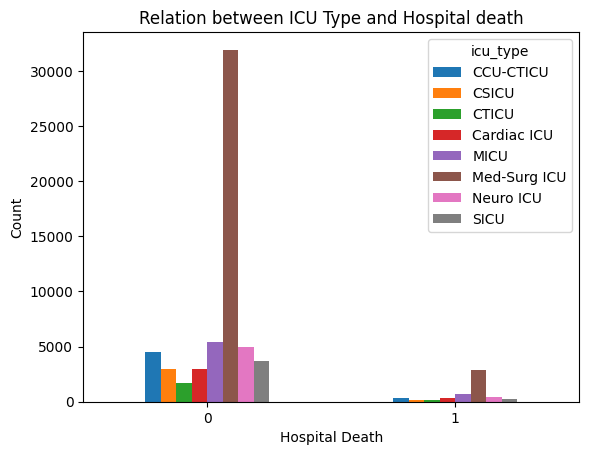

In [41]:

grouped_data = df.groupBy('icu_type', 'hospital_death').agg(count('*').alias('count'))

# Convert the PySpark DataFrame to a pandas DataFrame
pandas_df = grouped_data.toPandas()

# Plot the relation between the two categorical variables
pandas_df.pivot(index='hospital_death', columns='icu_type', values='count').plot(kind='bar')

# Add labels to the graph
plt.xticks(rotation=0)
plt.xlabel('Hospital Death')
plt.ylabel('Count')
plt.title('Relation between ICU Type and Hospital death')
plt.show()


# Hospital Death and apache_3j_bodysystem

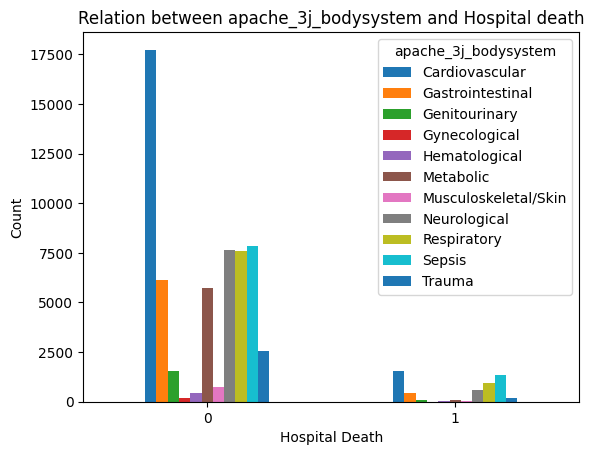

In [42]:

grouped_data = df.groupBy('apache_3j_bodysystem', 'hospital_death').agg(count('*').alias('count'))

# Convert the PySpark DataFrame to a pandas DataFrame
pandas_df = grouped_data.toPandas()

# Plot the relation between the two categorical variables
pandas_df.pivot(index='hospital_death', columns='apache_3j_bodysystem', values='count').plot(kind='bar')

# Add labels to the graph
plt.xticks(rotation=0)
plt.xlabel('Hospital Death')
plt.ylabel('Count')
plt.title('Relation between apache_3j_bodysystem and Hospital death')
plt.show()


# Hospital and apache_2_bodysystem

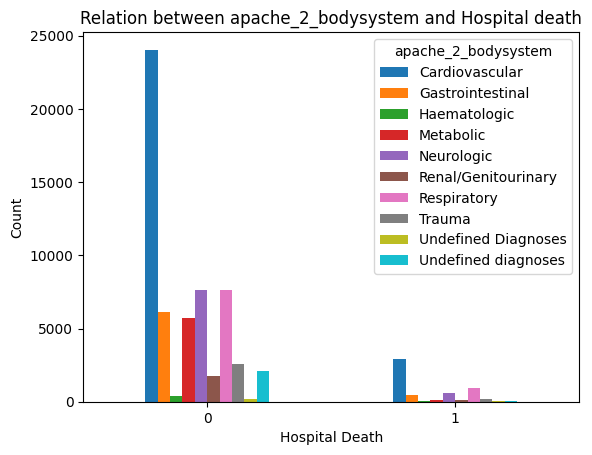

In [43]:

grouped_data = df.groupBy('apache_2_bodysystem', 'hospital_death').agg(count('*').alias('count'))

# Convert the PySpark DataFrame to a pandas DataFrame
pandas_df = grouped_data.toPandas()

# Plot the relation between the two categorical variables
pandas_df.pivot(index='hospital_death', columns='apache_2_bodysystem', values='count').plot(kind='bar')

# Add labels to the graph
plt.xticks(rotation=0)
plt.xlabel('Hospital Death')
plt.ylabel('Count')
plt.title('Relation between apache_2_bodysystem and Hospital death')
plt.show()


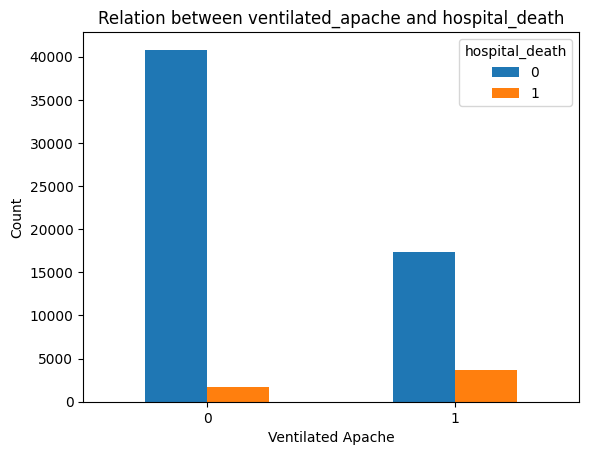

In [46]:



grouped_data = df.groupBy('ventilated_apache', 'hospital_death').agg(count('*').alias('count'))

# Convert the PySpark DataFrame to a pandas DataFrame
pandas_df = grouped_data.toPandas()

# Plot the relation between the two categorical variables
pandas_df.pivot(index='ventilated_apache', columns='hospital_death', values='count').plot(kind='bar')

# Add labels to the graph
plt.xticks(rotation=0)
plt.xlabel('Ventilated Apache')
plt.ylabel('Count')
plt.title('Relation between ventilated_apache and hospital_death')
plt.show()


In [48]:
len(df.columns)

34